讀檔

In [2]:
import pandas as pd
data_x = pd.read_csv('datafinal/final_x.csv/final_x.csv', encoding='utf8')

data_y = pd.read_csv('datafinal/before_standard_y.csv')

刪除data_x中['Unnamed: 0', 'Unnamed: 0.1', 'jobName', 'custName']

刪除data_y中['Unnamed: 0']，並且將salaryMin, salaryMax分開

In [3]:
import numpy as np
import ipykernel
columns = list(data_x.columns)
data_x_numpy = data_x.to_numpy()
data_y_numpy = data_y.to_numpy()[:,1:]


In [4]:
delete_index = []

for i in range(len(columns)):
    if "Unnamed" in data_x.columns[i]:
        delete_index.append(i)
    elif data_x.columns[i] == 'id':
        delete_index.append(i)
    # elif 'apply_education' in data_x.columns[i]:
    #     delete_index.append(i)
    # elif 'apply_age' in data_x.columns[i]:
    #     delete_index.append(i)

delete_index.reverse()

for j in delete_index:
    data_x_numpy = np.delete(data_x_numpy, j, 1)
    del columns[j]


In [5]:
data_x_numpy.shape, data_y_numpy.shape, len(columns)

((131624, 3967), (131624, 2), 3967)

## Feature Selection
使用Validation Threshold，從914個變數挑出294個

In [180]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression


sel = VarianceThreshold(threshold=(.99 * (1 - .99)))
X = sel.fit_transform(data_x_numpy)

# estimator = RandomForestRegressor(max_depth=5, n_estimators=150)
# sel = RFE(estimator=estimator, n_features_to_select=64, step=5)
# X = sel.fit_transform(X, y_max)

# sel = SelectKBest(mutual_info_regression, k=64)
# X = sel.fit_transform(data_x_new, y_max_std)

In [181]:
X.shape

(131624, 294)

In [182]:
selected_column = []
for i in range(len(sel.get_support())):
    if sel.get_support()[i] == True:
        selected_column.append(columns[i])

In [183]:
selected_column

['appearDate',
 'enviornmentPic',
 'driverLicense',
 'other',
 'welfare',
 'jobDescription',
 'businessTrip',
 'workPeriod',
 'edu_不拘',
 'edu_大學',
 'edu_大學、碩士',
 'edu_大學以上',
 'edu_專科、大學',
 'edu_專科、大學、碩士',
 'edu_專科以上',
 'edu_高中',
 'edu_高中、專科',
 'edu_高中、專科、大學',
 'edu_高中、專科、大學、碩士',
 'edu_高中以上',
 'edu_高中以下、高中、專科、大學',
 'major_一般商業學類',
 'major_商業及管理學科類',
 'major_土木工程相關',
 'major_工程學科類',
 'major_會計學相關',
 'major_機械工程相關',
 'major_機械維護相關',
 'major_護理助產相關',
 'major_資訊工程相關',
 'major_資訊管理相關',
 'major_電機電子工程相關',
 'major_電機電子維護相關',
 'language_中文',
 'language_日文',
 'language_英文',
 'specialty_Adobe Photoshop',
 'specialty_AutoCAD',
 'specialty_Excel',
 'specialty_Illustrator',
 'specialty_Outlook',
 'specialty_PowerPoint',
 'specialty_Word',
 'specialty_中文打字20~50',
 'specialty_中文打字50~75',
 'specialty_英文打字20~50',
 'skill_報表彙整與管理',
 'skill_客戶情報蒐集',
 'skill_客戶資料更新維護',
 'skill_客訴案件處理',
 'skill_文件或資料輸入建檔處理',
 'skill_文件收發與檔案管理',
 'skill_文件檔案資料處理、轉換及整合工作',
 'skill_文書處理╱排版能力',
 'skill_業務或通路開發',
 'skill_業績目標分配與

In [184]:
len(selected_column)

294

## Split Train, Valid and Test

In [448]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, data_y_numpy, test_size=0.2, random_state=42)
X_subtrain, X_valid, y_subtrain, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [449]:
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_valid shape:', X_valid.shape)
print('X_subtrain shape:', X_subtrain.shape)
print('y_subtrain shape:', y_subtrain.shape)
print('y_valid shape:', y_valid.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (105299, 294)
y_train shape: (105299, 2)
X_valid shape: (21060, 294)
X_subtrain shape: (84239, 294)
y_subtrain shape: (84239, 2)
y_valid shape: (21060, 2)
X_test shape: (26325, 294)
y_test shape: (26325, 2)


## SGD

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.multioutput import MultiOutputRegressor

rmse_sgd = []
sgd_lr = [0.00001, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.02, 0.05, 0.1, 1]

for i in sgd_lr:
    sgd =  MultiOutputRegressor(SGDRegressor(alpha=i, max_iter=10000))
    sgd.fit(X_subtrain, y_subtrain)
    ypred = sgd.predict(X_valid)
    rmse = 0
    for j in range(2):
        rmse += np.mean(np.square(y_valid[:, j] - ypred[:, j])) ** 0.5
    rmse_sgd.append(rmse/2)


In [ ]:
ypred

array([[30764.1098104 , 42536.70547343],
       [29490.68344829, 39042.05902386],
       [30390.53745925, 44659.06020852],
       ...,
       [30319.45830716, 39933.48137025],
       [30364.20558884, 42095.09266827],
       [30987.4958655 , 46044.82173908]])

In [ ]:
rmse_sgd

[12091.294694761506,
 12042.12948344804,
 12215.146396576392,
 12169.90763911824,
 12038.392434046287,
 12094.10339201061,
 12482.324706141848,
 12718.455622400093,
 12697.421115341698,
 13443.673531665438]

In [126]:
sgd_index = np.argmin(rmse_sgd)
best_alpha = sgd_lr[sgd_index]

In [127]:
best_sgd = MultiOutputRegressor(SGDRegressor(alpha=best_alpha, max_iter=100000))
best_sgd.fit(X_train, y_train)
ypred = best_sgd.predict(X_test)
rmse_1 = 0
rmse_2 = 0

mae_1 = np.mean(np.abs(y_test[:, 0] - ypred[:, 0]))
mae_2 = np.mean(np.abs(y_test[:, 1] - ypred[:, 1]))

rmse_1 += np.mean(np.square(y_test[:, 0] - ypred[:, 0])) ** 0.5
rmse_2 += np.mean(np.square(y_test[:, 1] - ypred[:, 1])) ** 0.5


In [128]:
rmse_1, rmse_2, mae_1, mae_2

(5419.29122846416, 18625.240363631197, 3304.4601506113318, 9652.589776071136)

## KNN

In [129]:
from sklearn.neighbors import KNeighborsRegressor

rmse_knn = []
knn_nei = [2, 3, 4 ,5, 6, 7, 8, 10, 20, 40, 80, 160]

for i in knn_nei:
    knn =  MultiOutputRegressor(KNeighborsRegressor(n_neighbors=i))
    knn.fit(X_subtrain, y_subtrain)
    ypred = knn.predict(X_valid)
    rmse = 0
    for j in range(2):
        rmse += np.mean(np.square(y_valid[:, j] - ypred[:, j])) ** 0.5
    rmse_knn.append(rmse/2)

In [130]:
rmse_knn

[11577.772320034488,
 11315.537914070548,
 11233.47011789926,
 11229.103328651789,
 11213.254854377787,
 11239.546127139409,
 11260.244233799482,
 11365.349758931909,
 11594.456103616512,
 11978.761793420652,
 12334.41375771492,
 12670.299786767293]

In [131]:
knn_index = np.argmin(rmse_knn)
best_alpha = knn_nei[knn_index]

In [132]:
best_knn = MultiOutputRegressor(KNeighborsRegressor(n_neighbors=best_alpha))
best_knn.fit(X_train, y_train)
ypred = best_knn.predict(X_test)
rmse_1 = 0
rmse_2 = 0

mae_1 = np.mean(np.abs(y_test[:, 0] - ypred[:, 0]))
mae_2 = np.mean(np.abs(y_test[:, 1] - ypred[:, 1]))

rmse_1 += np.mean(np.square(y_test[:, 0] - ypred[:, 0])) ** 0.5
rmse_2 += np.mean(np.square(y_test[:, 1] - ypred[:, 1])) ** 0.5



In [133]:
rmse_1, rmse_2, mae_1, mae_2

(5399.1248580577885, 16183.979516345938, 3115.948698955366, 8246.23182652738)

## Gradient Tree Boosting

Threshold = 0.99

max_depth = 5

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
rmse_gb = []
n_estimators = [200, 400, 600, 800, 1000, 1200, 1500, 2000, 2500]


for i in n_estimators:
    gb =  MultiOutputRegressor(GradientBoostingRegressor(n_estimators=i, max_depth=5))
    gb.fit(X_subtrain, y_subtrain)
    ypred = gb.predict(X_valid)
    rmse = 0
    for j in range(2):
        rmse += np.mean(np.square(y_valid[:, j] - ypred[:, j])) ** 0.5
    rmse_gb.append(rmse/2)


In [14]:
rmse_gb

[9471.567561328211, 9410.701879392233]

In [15]:
gb_index = np.argmin(rmse_gb)
best_alpha = n_estimators[gb_index]

In [16]:
best_gb =  MultiOutputRegressor(GradientBoostingRegressor(n_estimators=best_alpha, max_depth=5))
best_gb.fit(X_train, y_train)
ypred = best_gb.predict(X_test)

rmse_1 = 0
rmse_2 = 0

mae_1 = np.mean(np.abs(y_test[:, 0] - ypred[:, 0]))
mae_2 = np.mean(np.abs(y_test[:, 1] - ypred[:, 1]))

rmse_1 += np.mean(np.square(y_test[:, 0] - ypred[:, 0])) ** 0.5
rmse_2 += np.mean(np.square(y_test[:, 1] - ypred[:, 1])) ** 0.5

In [17]:
rmse_1, rmse_2, mae_1, mae_2

(4636.891432497217, 13696.120302662277, 2753.464853632676, 7259.781706352788)

max_depth = 7

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

rmse_gb = []
n_estimators = [200, 400, 600, 800, 1000, 1200, 1500, 2000, 2500]


for i in n_estimators:
    print(i)
    gb =  MultiOutputRegressor(GradientBoostingRegressor(n_estimators=i, max_depth=7))
    gb.fit(X_subtrain, y_subtrain)
    ypred = gb.predict(X_valid)
    rmse = 0
    for j in range(2):
        rmse += np.mean(np.square(y_valid[:, j] - ypred[:, j])) ** 0.5
    rmse_gb.append(rmse/2)


In [19]:
rmse_gb

[9316.836771563181, 9309.137532942896]

In [20]:
gb_index = np.argmin(rmse_gb)
best_alpha = n_estimators[gb_index]

In [21]:
best_gb =  MultiOutputRegressor(GradientBoostingRegressor(n_estimators=best_alpha, max_depth=7))
best_gb.fit(X_train, y_train)
ypred = best_gb.predict(X_test)

rmse_1 = 0
rmse_2 = 0

mae_1 = np.mean(np.abs(y_test[:, 0] - ypred[:, 0]))
mae_2 = np.mean(np.abs(y_test[:, 1] - ypred[:, 1]))

rmse_1 += np.mean(np.square(y_test[:, 0] - ypred[:, 0])) ** 0.5
rmse_2 += np.mean(np.square(y_test[:, 1] - ypred[:, 1])) ** 0.5

In [48]:

print("Salarymin RMSE", rmse_1)
print("Salarymax RMSE", rmse_2)
print("Salarymin MAE", mae_1)
print("Salarymax MAE", mae_2)

Salarymin RMSE 4508.970825328306
Salarymax RMSE 13269.581930344117
Salarymin MAE 2628.2377452636642
Salarymax MAE 6801.0722691006995


In [36]:
feature_importance = []
for models in best_gb.estimators_:
    feature_importance.append(models.feature_importances_)




前二十大重要特徵-min

In [44]:
import heapq
feature_importance = list(feature_importance)

most_important_index_list = map(list(feature_importance[0]).index, heapq.nlargest(20, feature_importance[0]))
most_important_index_list = list(most_important_index_list)

feature_list_twenty = []
coefficient_list = []
for i in range(20):
    feature_list_twenty.append(selected_column[most_important_index_list[i]])
    coefficient_list.append(feature_importance[0][most_important_index_list[i]])
top20_min = pd.DataFrame({'feature':feature_list_twenty, 'importance':coefficient_list})

In [45]:
top20_min

,feature,importance
0,welfare,0.140481
1,jobDescription,0.115157
2,other,0.047798
3,apply_male_ratio,0.036382
4,appearDate,0.029660
5,enviornmentPic,0.022279
6,jobCategory_軟體設計工程師,0.017764
7,edu_大學以上,0.016219
8,jobCategory_門市／店員／專櫃人員,0.014835
9,apply_lang_英文_精通,0.013741


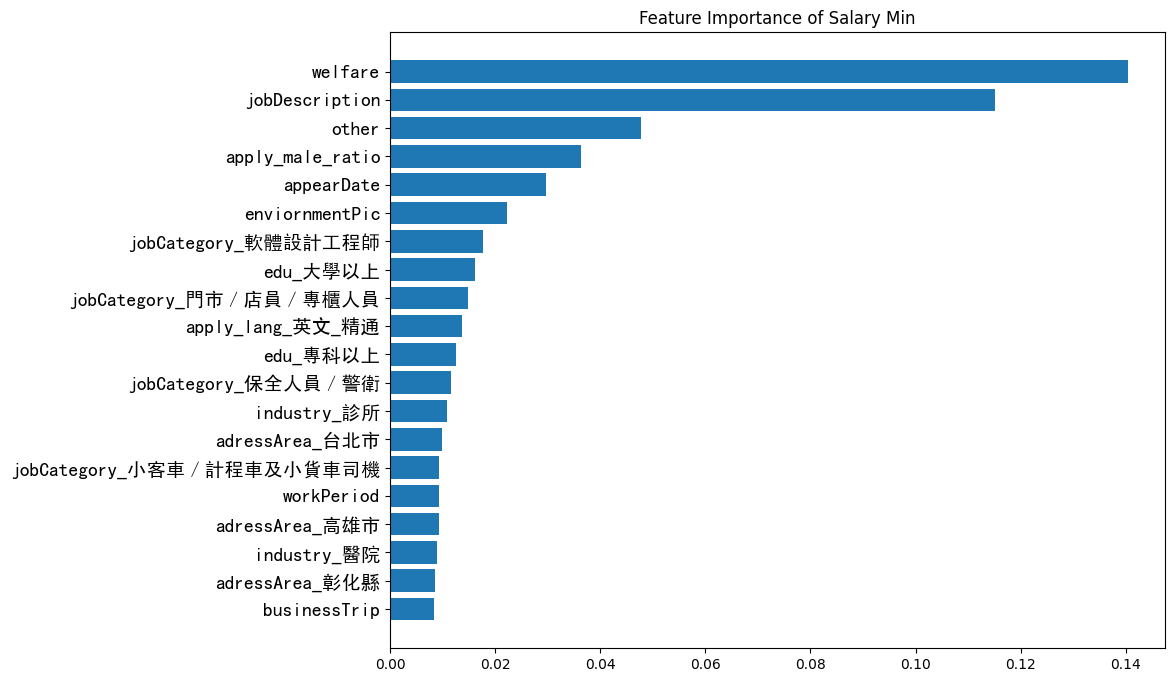

In [363]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

rank = list(range(1, 21))
rank.reverse()

font = FontProperties(fname="SimHei.ttf", size=14)

plt.figure(figsize=(10, 8))
plt.barh(rank, top20_min['importance'])
plt.yticks(rank, top20_min['feature'], fontproperties=font)
plt.title('Feature Importance of Salary Min')
plt.show()

前二十大重要特徵-max

In [46]:
import heapq
feature_importance = list(feature_importance)

most_important_index_list = map(list(feature_importance[1]).index, heapq.nlargest(20, feature_importance[1]))
most_important_index_list = list(most_important_index_list)

feature_list_twenty = []
coefficient_list = []
for i in range(20):
    feature_list_twenty.append(selected_column[most_important_index_list[i]])
    coefficient_list.append(feature_importance[1][most_important_index_list[i]])
top20_max = pd.DataFrame({'feature':feature_list_twenty, 'importance':coefficient_list})

In [47]:
top20_max

,feature,importance
0,jobDescription,0.116016
1,jobCategory_國內業務人員,0.096391
2,welfare,0.078987
3,industry_運動服務業,0.064882
4,other,0.058984
5,edu_不拘,0.031295
6,appearDate,0.027950
7,edu_高中以上,0.027452
8,enviornmentPic,0.026824
9,industry_不動產經營業,0.021856


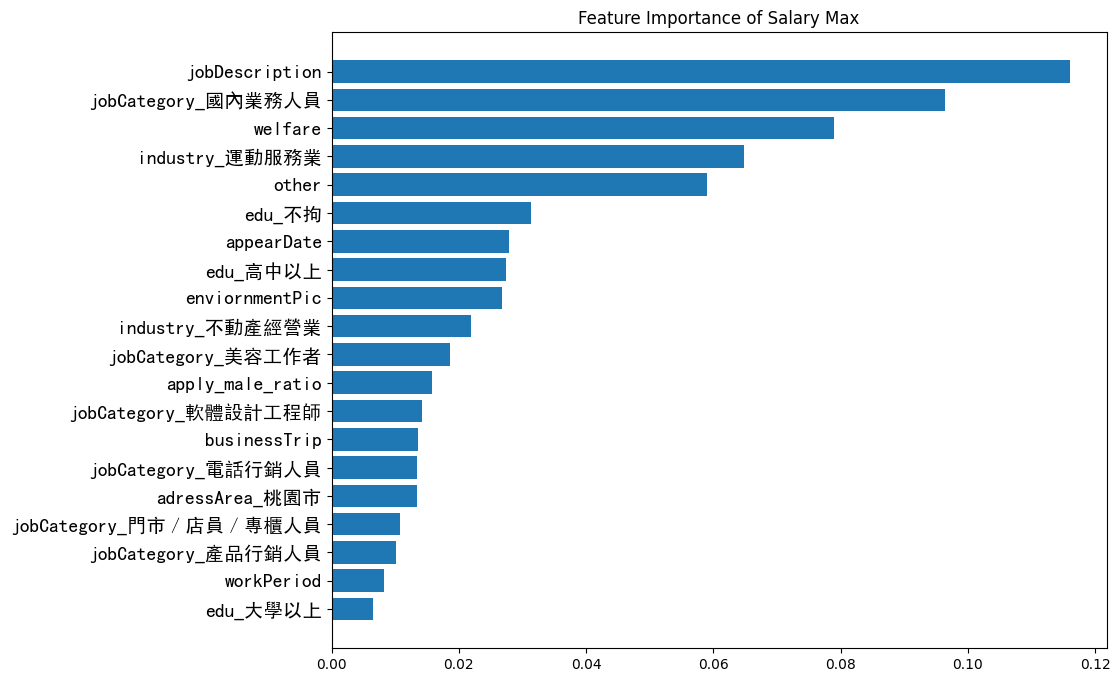

In [374]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

rank = list(range(1, 21))
rank.reverse()

font = FontProperties(fname="SimHei.ttf", size=14)

plt.figure(figsize=(10, 8))
plt.barh(rank, top20_max['importance'])
plt.yticks(rank, top20_max['feature'], fontproperties=font)
plt.title('Feature Importance of Salary Max')
plt.show()

Threshold = 0.9

In [ ]:
gb =  MultiOutputRegressor(GradientBoostingRegressor(n_estimators=2500, max_depth=7))
gb.fit(X_train, y_train)


In [157]:
ypred = gb.predict(X_test)

rmse_1 = 0
rmse_2 = 0

mae_1 = np.mean(np.abs(y_test[:, 0] - ypred[:, 0]))
mae_2 = np.mean(np.abs(y_test[:, 1] - ypred[:, 1]))

rmse_1 += np.mean(np.square(y_test[:, 0] - ypred[:, 0])) ** 0.5
rmse_2 += np.mean(np.square(y_test[:, 1] - ypred[:, 1])) ** 0.5

In [158]:
print("Salarymin RMSE", rmse_1)
print("Salarymax RMSE", rmse_2)
print("Salarymin MAE", mae_1)
print("Salarymax MAE", mae_2)

Salarymin RMSE 4935.447440130786
Salarymax RMSE 14809.656997530328
Salarymin MAE 2920.92458740076
Salarymax MAE 7866.999540725796


Threshold = 0.95

In [167]:
gb =  MultiOutputRegressor(GradientBoostingRegressor(n_estimators=2500, max_depth=7))
gb.fit(X_train, y_train)
ypred = gb.predict(X_test)

rmse_1 = 0
rmse_2 = 0

mae_1 = np.mean(np.abs(y_test[:, 0] - ypred[:, 0]))
mae_2 = np.mean(np.abs(y_test[:, 1] - ypred[:, 1]))

rmse_1 += np.mean(np.square(y_test[:, 0] - ypred[:, 0])) ** 0.5
rmse_2 += np.mean(np.square(y_test[:, 1] - ypred[:, 1])) ** 0.5

In [168]:
print("Salarymin RMSE", rmse_1)
print("Salarymax RMSE", rmse_2)
print("Salarymin MAE", mae_1)
print("Salarymax MAE", mae_2)

Salarymin RMSE 4806.874942897255
Salarymax RMSE 14003.8679603651
Salarymin MAE 2859.022060908901
Salarymax MAE 7441.962645274396


Threshold = 0.975

In [177]:
gb =  MultiOutputRegressor(GradientBoostingRegressor(n_estimators=2500, max_depth=7))
gb.fit(X_train, y_train)
ypred = gb.predict(X_test)

rmse_1 = 0
rmse_2 = 0

mae_1 = np.mean(np.abs(y_test[:, 0] - ypred[:, 0]))
mae_2 = np.mean(np.abs(y_test[:, 1] - ypred[:, 1]))

rmse_1 += np.mean(np.square(y_test[:, 0] - ypred[:, 0])) ** 0.5
rmse_2 += np.mean(np.square(y_test[:, 1] - ypred[:, 1])) ** 0.5

In [178]:
print("Salarymin RMSE", rmse_1)
print("Salarymax RMSE", rmse_2)
print("Salarymin MAE", mae_1)
print("Salarymax MAE", mae_2)

Salarymin RMSE 4808.581973713453
Salarymax RMSE 13997.610498936361
Salarymin MAE 2782.469824527996
Salarymax MAE 7322.020772848027


模型結果視覺化

In [187]:
ypred = best_gb.predict(X_test)

rmse_1 = 0
rmse_2 = 0

mae_1 = np.mean(np.abs(y_test[:, 0] - ypred[:, 0]))
mae_2 = np.mean(np.abs(y_test[:, 1] - ypred[:, 1]))

rmse_1 += np.mean(np.square(y_test[:, 0] - ypred[:, 0])) ** 0.5
rmse_2 += np.mean(np.square(y_test[:, 1] - ypred[:, 1])) ** 0.5

In [188]:
print("Salarymin RMSE", rmse_1)
print("Salarymax RMSE", rmse_2)
print("Salarymin MAE", mae_1)
print("Salarymax MAE", mae_2)

Salarymin RMSE 4508.970825328306
Salarymax RMSE 13269.581930344117
Salarymin MAE 2628.2377452636642
Salarymax MAE 6801.0722691006995


結果散點圖

<function matplotlib.pyplot.show(close=None, block=None)>

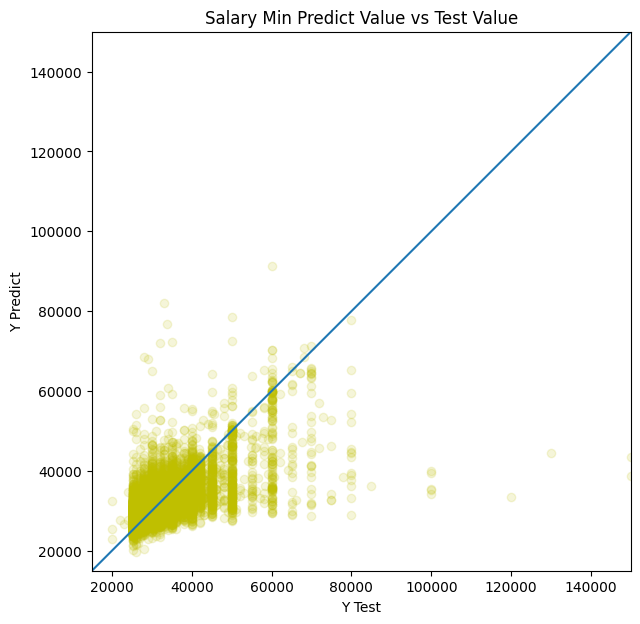

In [269]:
import matplotlib.pyplot as plt


plt.figure(figsize=(7,7))
plt.axline([0, 0], slope=1)
plt.scatter(y_test[:,:1], ypred[:,:1], c="y", alpha=0.15)
plt.title('Salary Min Predict Value vs Test Value')
plt.xlabel('Y Test')
plt.ylabel('Y Predict')
plt.axis('square')
plt.xlim(15000, 150000)
plt.ylim(15000, 150000)
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

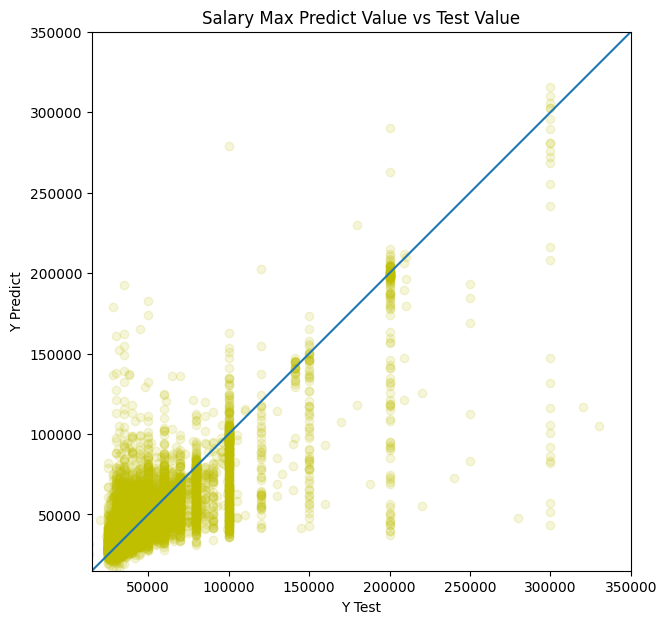

In [268]:
import matplotlib.pyplot as plt


plt.figure(figsize=(7,7))
plt.axline([0, 0], slope=1)
plt.scatter(y_test[:,1:], ypred[:,1:], c="y", alpha=0.15)
plt.title('Salary Max Predict Value vs Test Value')
plt.xlabel('Y Test')
plt.ylabel('Y Predict')
plt.axis('square')
plt.xlim(15000, 350000)
plt.ylim(15000, 350000)
plt.show


In [322]:
test_data_list_min= []

for i in range(len(list(y_test[:,:1]))):
    test_data_list_min.append(y_test[:,:1][i][0])

In [336]:
predict_data_list_min= []

for i in range(len(list(ypred[:,:1]))):
    predict_data_list_min.append(ypred[:,:1][i][0])

In [346]:
test_data_list_max= []

for i in range(len(list(y_test[:,1:]))):
    test_data_list_max.append(y_test[:,1:][i][0])

In [347]:
predict_data_list_max= []

for i in range(len(list(ypred[:,1:]))):
    predict_data_list_max.append(ypred[:,1:][i][0])

結果箱型圖

C:\Users\林盃\AppData\Local\Temp\ipykernel_3316\2249224014.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  plt.boxplot(np.array(boxdata).transpose(), 0, '', labels=('Y Test','Y_predict'))


<function matplotlib.pyplot.show(close=None, block=None)>

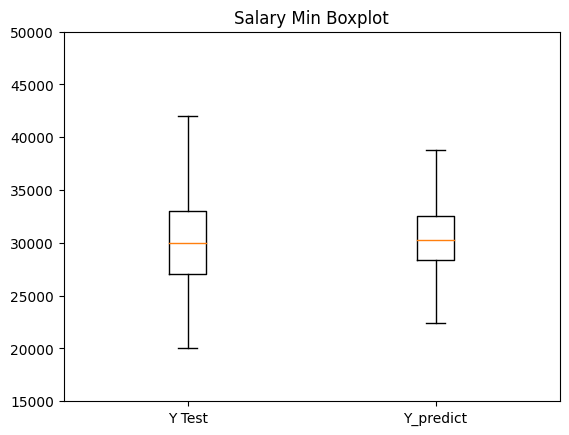

In [359]:
boxdata = [test_data_list_min, predict_data_list_min]


plt.boxplot(np.array(boxdata).transpose(), 0, '', labels=('Y Test','Y_predict'))
plt.ylim(15000, 50000)
plt.title('Salary Min Boxplot')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

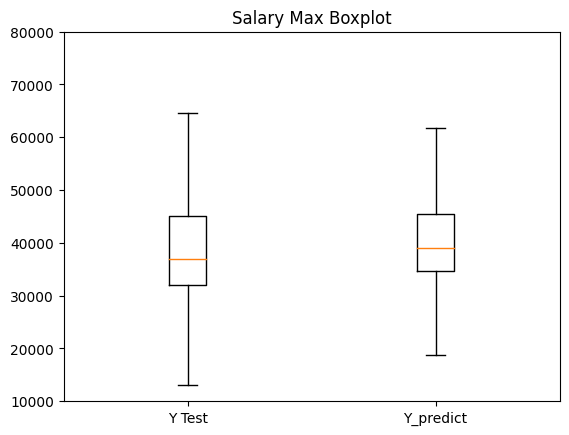

In [358]:
boxdata = [test_data_list_max, predict_data_list_max]


plt.boxplot(np.array(boxdata).transpose(), 0, '', labels=('Y Test','Y_predict'))
plt.ylim(10000, 80000)
plt.title('Salary Max Boxplot')
plt.show

Get Coefficients

In [450]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn import linear_model

best_ridge = MultiOutputRegressor(linear_model.Ridge(alpha=10)).fit(X_train, y_train)
ypred = best_ridge.predict(X_test)
best_ridge_rmse = []
best_ridge_rmse.append(np.mean(np.square(y_test[:, 0] - ypred[:, 0])) ** 0.5)
best_ridge_rmse.append(np.mean(np.square(y_test[:, 1] - ypred[:, 1])) ** 0.5)

In [455]:
best_ridge_rmse

[5376.0704282828965, 18330.898605495415]

In [451]:
best_ridge_model_min = best_ridge.estimators_[0]
coef_min = best_ridge_model_min.coef_

In [452]:
import pandas as pd
coefficient = []
for i in top20_min['feature']:
    index = selected_column.index(i)
    coefficient.append(coef_min[index])
d = {'feature':top20_min['feature'], 'coefficient':coefficient}
pd.DataFrame(data=d)

,feature,coefficient
0,welfare,91.423321
1,jobDescription,782.976473
2,other,270.098173
3,apply_male_ratio,995.184316
4,appearDate,-12.225107
5,enviornmentPic,-33.524796
6,jobCategory_軟體設計工程師,3681.537426
7,edu_大學以上,684.559105
8,jobCategory_門市／店員／專櫃人員,-1225.407359
9,apply_lang_英文_精通,1017.082266


In [453]:
best_ridge_model_max = best_ridge.estimators_[1]
coef_max = best_ridge_model_max.coef_

In [454]:
import pandas as pd
coefficient = []
for i in top20_max['feature']:
    index = selected_column.index(i)
    coefficient.append(coef_max[index])
d = {'feature':top20_max['feature'], 'coefficient':coefficient}
pd.DataFrame(data=d)

,feature,coefficient
0,jobDescription,2264.222280
1,jobCategory_國內業務人員,14030.143701
2,welfare,81.829961
3,industry_運動服務業,37917.993848
4,other,447.050330
5,edu_不拘,1897.128140
6,appearDate,-53.898999
7,edu_高中以上,699.035523
8,enviornmentPic,172.401572
9,industry_不動產經營業,15034.220424


變數整理 Salary min

In [400]:
def feature_dataframe_min(column):
    c_lst = []
    c_coef = []
    c_importance = []
    for i in selected_column:
        if column in i:
            index = selected_column.index(i)
            c_lst.append(i)
            c_coef.append(coef_min[index])
            c_importance.append(feature_importance[0][index])
    c_d = {column:c_lst, 'coefficient':c_coef, 'feature_importance':c_importance}
    c_df = pd.DataFrame(data=c_d)
    return c_df.sort_values(by=['feature_importance'], ascending=False)

In [425]:
major_lst = []
major_coef = []
major_importance = []
for i in selected_column:
    if 'apply_major' not in i and 'major' in i:
        index = selected_column.index(i)
        major_lst.append(i)
        major_coef.append(coef_min[index])
        major_importance.append(feature_importance[0][index])
major_d = {'major':major_lst, 'coefficient':major_coef, 'feature_importance':major_importance}
major_df = pd.DataFrame(data=major_d)
major_df = major_df.sort_values(by=['feature_importance'], ascending=False)


In [426]:
major_min = major_df.iloc[:10,:]

,major,coefficient,feature_importance
2,major_土木工程相關,2086.779278,0.003965
3,major_工程學科類,582.669386,0.002106
10,major_電機電子工程相關,362.564951,0.001944
8,major_資訊工程相關,708.782280,0.001479
9,major_資訊管理相關,-1630.178672,0.001105
11,major_電機電子維護相關,468.097305,0.001024
5,major_機械工程相關,238.013728,0.000968
7,major_護理助產相關,303.320396,0.000505
1,major_商業及管理學科類,-524.623061,0.000357
6,major_機械維護相關,-132.779984,0.000329


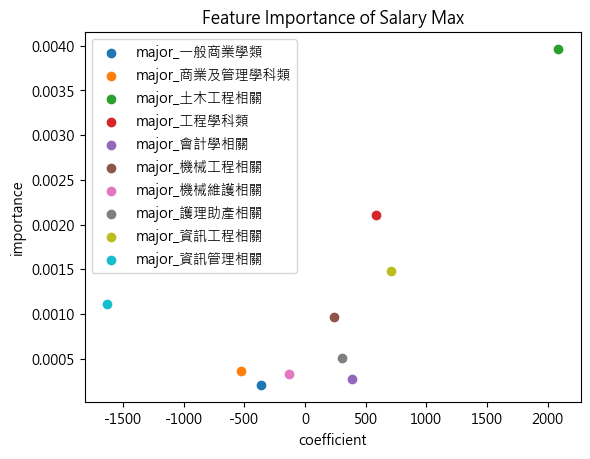

In [474]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

rank = list(range(1, 21))
rank.reverse()
data_x = major_min['coefficient']
data_y = major_min['feature_importance']
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False

for i in range(10):
    plt.scatter(data_x[i],data_y[i],label=major_min['major'][i])
plt.xlabel('coefficient')
plt.ylabel('importance')

plt.title('Feature Importance of Salary Max')
plt.legend()
plt.show()

In [427]:
industry_min = feature_dataframe_min('industry')

In [428]:
industry_min.iloc[:10,:]

,industry,coefficient,feature_importance
19,industry_診所,1315.072968,0.010742
21,industry_醫院,1259.442649,0.008938
0,industry_不動產經營業,1789.924371,0.008151
2,industry_保全樓管相關業,1761.762377,0.007761
28,industry_餐館業,1329.758852,0.005694
10,industry_建築工程業,2461.082838,0.005019
1,industry_人力仲介代徵,3335.680168,0.004192
17,industry_美容／美體業,691.220721,0.004156
4,industry_其他醫療保健服務業,849.940919,0.003446
12,industry_汽車及其零件製造業,-880.946926,0.003187


In [429]:
adressArea_min = feature_dataframe_min('adressArea')

In [430]:
adressArea_min.iloc[:10,:]

,adressArea,coefficient,feature_importance
2,adressArea_台北市,890.281345,0.009787
14,adressArea_高雄市,-877.290655,0.009300
7,adressArea_彰化縣,-709.058320,0.008615
11,adressArea_桃園市,803.425700,0.008221
8,adressArea_新北市,341.224619,0.005371
1,adressArea_台中市,-394.124298,0.004268
3,adressArea_台南市,-708.310916,0.003417
10,adressArea_新竹縣,568.997298,0.003035
9,adressArea_新竹市,801.711054,0.002643
13,adressArea_雲林縣,-607.812869,0.001413


In [456]:
jobCategory_min = feature_dataframe_min('jobCategory')

In [457]:
jobCategory_min.iloc[:10,:]

,jobCategory,coefficient,feature_importance
42,jobCategory_軟體設計工程師,3681.537426,0.017764
45,jobCategory_門市／店員／專櫃人員,-1225.407359,0.014835
2,jobCategory_保全人員／警衛,2112.736530,0.011544
17,jobCategory_小客車／計程車及小貨車司機,2565.092020,0.009386
1,jobCategory_作業員／包裝員,-1630.877622,0.006981
13,jobCategory_國內業務人員,-810.536247,0.006882
40,jobCategory_護理師及護士,839.404868,0.006062
14,jobCategory_外務／快遞／送貨,1517.918479,0.006002
34,jobCategory_行政助理,-1463.819330,0.005624
32,jobCategory_美容工作者,-188.896798,0.004975


變數整理 Salary max

In [409]:
def feature_dataframe_max(column):
    c_lst = []
    c_coef = []
    c_importance = []
    for i in selected_column:
        if column in i:
            index = selected_column.index(i)
            c_lst.append(i)
            c_coef.append(coef_max[index])
            c_importance.append(feature_importance[1][index])
    c_d = {column:c_lst, 'coefficient':c_coef, 'feature_importance':c_importance}
    c_df = pd.DataFrame(data=c_d)
    return c_df.sort_values(by=['feature_importance'], ascending=False)

In [431]:
major_lst = []
major_coef = []
major_importance = []
for i in selected_column:
    if 'apply_major' not in i and 'major' in i:
        index = selected_column.index(i)
        major_lst.append(i)
        major_coef.append(coef_max[index])
        major_importance.append(feature_importance[1][index])
major_d = {'major':major_lst, 'coefficient':major_coef, 'feature_importance':major_importance}
major_df = pd.DataFrame(data=major_d)
major_df = major_df.sort_values(by=['feature_importance'], ascending=False)


In [432]:
major_df.iloc[:10,:]

,major,coefficient,feature_importance
2,major_土木工程相關,6107.268153,0.001725
10,major_電機電子工程相關,1969.851907,0.001577
8,major_資訊工程相關,1834.029704,0.000937
3,major_工程學科類,1168.094538,0.000497
9,major_資訊管理相關,-3971.161289,0.000415
11,major_電機電子維護相關,-190.495869,0.000344
5,major_機械工程相關,63.702639,0.000336
1,major_商業及管理學科類,-1465.041240,0.000314
7,major_護理助產相關,151.811740,0.000171
6,major_機械維護相關,-642.315827,0.000158


In [433]:
adressArea_max = feature_dataframe_max('adressArea')

In [434]:
adressArea_max.iloc[:10,:]

,adressArea,coefficient,feature_importance
11,adressArea_桃園市,3317.834746,0.013417
3,adressArea_台南市,-212.682057,0.003672
14,adressArea_高雄市,-667.870676,0.003542
1,adressArea_台中市,615.298026,0.003271
2,adressArea_台北市,2051.657155,0.002759
8,adressArea_新北市,1420.865632,0.002247
7,adressArea_彰化縣,-548.368577,0.001198
9,adressArea_新竹市,2361.884800,0.001154
10,adressArea_新竹縣,1873.363758,0.000900
13,adressArea_雲林縣,-329.612156,0.000642


In [435]:
industry_max = feature_dataframe_max('industry')

In [436]:
industry_max.iloc[:10,:]

,industry,coefficient,feature_importance
20,industry_運動服務業,38525.962571,0.064882
0,industry_不動產經營業,15133.409296,0.021856
12,industry_汽車及其零件製造業,4788.783330,0.004880
14,industry_百貨相關業,-6724.428917,0.004642
9,industry_工商顧問服務業,1055.284225,0.004254
16,industry_網際網路相關業,3719.772044,0.003810
19,industry_診所,254.876239,0.003153
17,industry_美容／美體業,-1547.640019,0.002585
22,industry_量販流通相關業,-7917.509345,0.002336
11,industry_旅館業,-4181.600338,0.002235


In [459]:
jobCategory_max = feature_dataframe_max('jobCategory')

In [475]:
jobCategory_max.iloc[:10,:]

,jobCategory,coefficient,feature_importance
13,jobCategory_國內業務人員,14030.143701,0.096391
32,jobCategory_美容工作者,18569.923553,0.018604
42,jobCategory_軟體設計工程師,11949.396538,0.014254
48,jobCategory_電話行銷人員,26576.700998,0.013502
45,jobCategory_門市／店員／專櫃人員,-3370.361078,0.010746
30,jobCategory_產品行銷人員,6176.005757,0.010198
14,jobCategory_外務／快遞／送貨,2824.317731,0.004643
52,jobCategory_餐飲服務生,-3676.237510,0.004173
44,jobCategory_連鎖店管理人員,-1129.655322,0.004151
20,jobCategory_店長／賣場管理人員,-373.723062,0.003661
